In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.util.misc import all_combinations

In [2]:
# number of points to be used for plotting
n_points = 100

# the xlim
P = np.linspace(0, 3, n_points)

# used for the meshgrid
X = all_combinations(P,P)

In [3]:
def plot_contour(X, F):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))

    fig, ax = plt.subplots()
    ax.contour(_X,_Y, _Z, colors='black')
    ax.arrow(0, 0, 2.5, 2.5, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

The weights to be used by the decomposition functions:

In [4]:
weights = [0.5, 0.5]

## Weighted sum

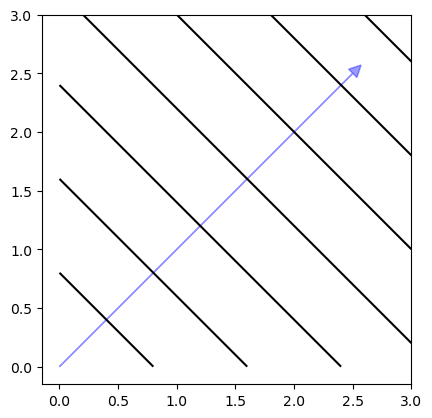

In [5]:
from pymoo.decomposition.weighted_sum import WeightedSum

dm = WeightedSum()
plot_contour(X, dm(X, weights=weights))

## Chebyshev

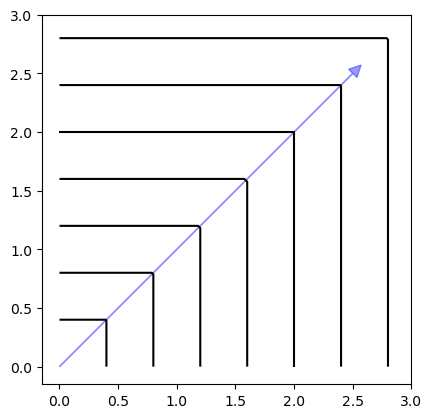

In [6]:
from pymoo.decomposition.tchebicheff import Tchebicheff

dm = Tchebicheff()
plot_contour(X, dm(X, weights=weights))

## Augmented Chebyshev

In [7]:
from pymoo.core.decomposition import Decomposition

class AugTchebicheff(Decomposition):

    def _do(self, F, weights, rho, **kwargs):
        v = np.abs(F - self.utopian_point) * weights
        tchebi = v.max(axis=1) + rho * (np.abs(F - self.utopian_point)).sum(axis=1) 
        return tchebi

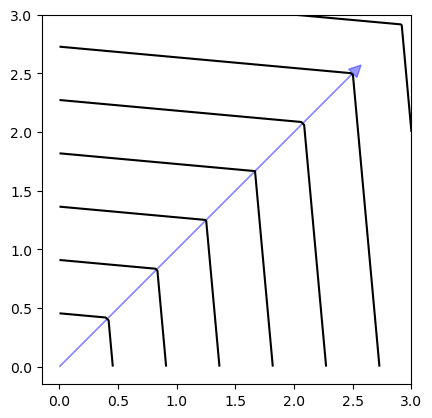

In [8]:
dm = AugTchebicheff()
plot_contour(X, dm(X, weights=[1., 1.], rho=0.1))